# Simulation de l'écoulement de la cavité entraînée à l'aide de la méthode Multi-Relaxation-Time Lattice Boltzmann

La méthode MRT Lattice Boltzmann est utilisée pour simuler numériquement l'écoulement incompressible visqueux constant dans une cavité entraînée.

In [45]:
import numpy as np
import matplotlib.pyplot as plt

### Les paramètres de la simulation

In [46]:
m = 100                                           # Le nombre de points de la grille
U0 = 1                                            # Température initiale sur le bord haut
tau = 1                                           # Pas de temps
delta = 1                                         # Pas d'espace
nu = 0.01                                         # la viscosité
u0 = 5                                            # Densité initiale
t0 = 0                                            # la température initiale
Pr = 0.71                                         # Le nombre de Prandtl
D = nu/Pr                                         # Le coefficient de diffusion
v0 = 0.2                                          # la vitesse initiale  
Nb_iter = 100000                                  # Nombre d'itérations                                  # A modifier
omega_m = 1/(3*nu + 0.5)                          # Temps de relaxation de la vitesse de Navier Stokes
omega_s = 1/(3*D + 0.5)                           # Temps de relaxation de la chaleur 
lambda_ = 1                                      
Ra = 1000                                         # Nombre de Rayleigh                                   # A modifier
gbeta = nu*D*Ra/m**3                              # Pour la force de boussinesq

M = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
              [0, lambda_, 0, -lambda_, 0, lambda_, -lambda_, -lambda_, lambda_],
              [0, 0, lambda_, 0, -lambda_, lambda_, lambda_, -lambda_, -lambda_],
              [-4, -1, -1, -1, -1, 2, 2, 2, 2],
              [4, -2, -2, -2, -2, 1, 1, 1, 1],
              [0, -2, 0, 2, 0, 1, -1, -1, 1],
              [0, 0, -2, 0, 2, 1, 1, -1, -1],
              [0, 1, -1, 1, -1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, -1, 1, -1]], dtype='float64')

M_inv = np.linalg.inv(M)

s0, s1, s2, s3, s4, s5, s6, s7, s8 = omega_m, omega_m, omega_m, omega_m, omega_m, omega_m, omega_m, omega_m, omega_m             # Les temps de relaxation de la vitesse de Navier Stokes
wo, w1, w2, w3, w4, w5, w6, w7, w8 = omega_s, omega_s, omega_s, omega_s, omega_s, omega_s, omega_s, omega_s, omega_s             # Les temps de relaxation de la chaleur

### Initialisation

In [47]:
f = np.zeros((m+1, m+1), dtype='float64')                                                                    # Initialisation de la densité de particules
f = f + 1
chi = np.zeros((m+1, m+1), dtype='float64')                                                                  # Initialisation de la chaleur
chi[0,:] = 0

#Données d'entrées
f0, f1, f2, f3, f4, f5, f6, f7, f8 = 4*f/9, f/9, f/9, f/9, f/9, f/36, f/36, f/36, f/36                       # Les poids de la densité de particules
g0, g1, g2, g3, g4, g5, g6, g7, g8 = 4*chi/9, chi/9, chi/9, chi/9, chi/9, chi/36, chi/36, chi/36, chi/36     # Les poids de la chaleur

# Pour la vitesse
v1 = np.zeros((m+1, m+1), dtype='float64')                                                                   # Initialisation de la vitesse
v2 = np.zeros((m+1, m+1), dtype='float64')                                                                 
v1[0,:] = v0                                                                                                 # Condition initiale de la vitesse

### Les 

In [48]:
# Fonction de passage dans l'espace des moments pour la vitesse et la chaleur
def passage_espace_moments(M, f0, f1, f2, f3, f4, f5, f6, f7, f8):
    m0 = M[0][0]*f0 + M[0][1]*f1 + M[0][2]*f2 + M[0][3]*f3 + M[0][4]*f4 + M[0][5]*f5 + M[0][6]*f6 + M[0][7]*f7 + M[0][8]*f8
    m1 = M[1][0]*f0 + M[1][1]*f1 + M[1][2]*f2 + M[1][3]*f3 + M[1][4]*f4 + M[1][5]*f5 + M[1][6]*f6 + M[1][7]*f7 + M[1][8]*f8
    m2 = M[2][0]*f0 + M[2][1]*f1 + M[2][2]*f2 + M[2][3]*f3 + M[2][4]*f4 + M[2][5]*f5 + M[2][6]*f6 + M[2][7]*f7 + M[2][8]*f8
    m3 = M[3][0]*f0 + M[3][1]*f1 + M[3][2]*f2 + M[3][3]*f3 + M[3][4]*f4 + M[3][5]*f5 + M[3][6]*f6 + M[3][7]*f7 + M[3][8]*f8
    m4 = M[4][0]*f0 + M[4][1]*f1 + M[4][2]*f2 + M[4][3]*f3 + M[4][4]*f4 + M[4][5]*f5 + M[4][6]*f6 + M[4][7]*f7 + M[4][8]*f8
    m5 = M[5][0]*f0 + M[5][1]*f1 + M[5][2]*f2 + M[5][3]*f3 + M[5][4]*f4 + M[5][5]*f5 + M[5][6]*f6 + M[5][7]*f7 + M[5][8]*f8
    m6 = M[6][0]*f0 + M[6][1]*f1 + M[6][2]*f2 + M[6][3]*f3 + M[6][4]*f4 + M[6][5]*f5 + M[6][6]*f6 + M[6][7]*f7 + M[6][8]*f8
    m7 = M[7][0]*f0 + M[7][1]*f1 + M[7][2]*f2 + M[7][3]*f3 + M[7][4]*f4 + M[7][5]*f5 + M[7][6]*f6 + M[7][7]*f7 + M[7][8]*f8
    m8 = M[8][0]*f0 + M[8][1]*f1 + M[8][2]*f2 + M[8][3]*f3 + M[8][4]*f4 + M[8][5]*f5 + M[8][6]*f6 + M[8][7]*f7 + M[8][8]*f8
    return m0, m1, m2, m3, m4, m5, m6, m7, m8

# Fonction de collision pour le premier schéma
def collision_f(s3, s4, s5, s6, s7, s8, m3, m4, m5, m6, m7, m8, m3_eq, m4_eq, m5_eq, m6_eq, m7_eq, m8_eq):
    m3 = m3*(1-s3) + s3*m3_eq
    m4 = m4*(1-s4) + s4*m4_eq
    m5 = m5*(1-s5) + s5*m5_eq
    m6 = m6*(1-s6) + s6*m6_eq
    m7 = m7*(1-s7) + s7*m7_eq
    m8 = m8*(1-s8) + s8*m8_eq
    return m3, m4, m5, m6, m7, m8

# Fonction de collision pour le second schéma
def collision_g(w1, w2, w3, w4, w5, w6, w7, w8, m_t_1, m_t_2, m_t_3, m_t_4, m_t_5, m_t_6, m_t_7, m_t_8, m_t_1_eq, m_t_2_eq, m_t_3_eq, m_t_4_eq, m_t_5_eq, m_t_6_eq, m_t_7_eq, m_t_8_eq):
    m_t_1 = m_t_1*(1-w1) + w1*m_t_1_eq
    m_t_2 = m_t_2*(1-w2) + w2*m_t_2_eq
    m_t_3 = m_t_3*(1-w3) + w3*m_t_3_eq
    m_t_4 = m_t_4*(1-w4) + w4*m_t_4_eq
    m_t_5 = m_t_5*(1-w5) + w5*m_t_5_eq
    m_t_6 = m_t_6*(1-w6) + w6*m_t_6_eq
    m_t_7 = m_t_7*(1-w7) + w7*m_t_7_eq
    m_t_8 = m_t_8*(1-w8) + w8*m_t_8_eq
    return m_t_1, m_t_2, m_t_3, m_t_4, m_t_5, m_t_6, m_t_7, m_t_8

# Fonction qui renvoie les f_i et g_i 
def passage_espace_var(M_inv, m0, m1, m2, m3, m4, m5, m6, m7, m8):
    f0 = M_inv[0][0]*m0 + M_inv[0][1]*m1 + M_inv[0][2]*m2 + M_inv[0][3]*m3 + M_inv[0][4]*m4 + M_inv[0][5]*m5 + M_inv[0][6]*m6 + M_inv[0][7]*m7 + M_inv[0][8]*m8
    f1 = M_inv[1][0]*m0 + M_inv[1][1]*m1 + M_inv[1][2]*m2 + M_inv[1][3]*m3 + M_inv[1][4]*m4 + M_inv[1][5]*m5 + M_inv[1][6]*m6 + M_inv[1][7]*m7 + M_inv[1][8]*m8
    f2 = M_inv[2][0]*m0 + M_inv[2][1]*m1 + M_inv[2][2]*m2 + M_inv[2][3]*m3 + M_inv[2][4]*m4 + M_inv[2][5]*m5 + M_inv[2][6]*m6 + M_inv[2][7]*m7 + M_inv[2][8]*m8
    f3 = M_inv[3][0]*m0 + M_inv[3][1]*m1 + M_inv[3][2]*m2 + M_inv[3][3]*m3 + M_inv[3][4]*m4 + M_inv[3][5]*m5 + M_inv[3][6]*m6 + M_inv[3][7]*m7 + M_inv[3][8]*m8
    f4 = M_inv[4][0]*m0 + M_inv[4][1]*m1 + M_inv[4][2]*m2 + M_inv[4][3]*m3 + M_inv[4][4]*m4 + M_inv[4][5]*m5 + M_inv[4][6]*m6 + M_inv[4][7]*m7 + M_inv[4][8]*m8
    f5 = M_inv[5][0]*m0 + M_inv[5][1]*m1 + M_inv[5][2]*m2 + M_inv[5][3]*m3 + M_inv[5][4]*m4 + M_inv[5][5]*m5 + M_inv[5][6]*m6 + M_inv[5][7]*m7 + M_inv[5][8]*m8
    f6 = M_inv[6][0]*m0 + M_inv[6][1]*m1 + M_inv[6][2]*m2 + M_inv[6][3]*m3 + M_inv[6][4]*m4 + M_inv[6][5]*m5 + M_inv[6][6]*m6 + M_inv[6][7]*m7 + M_inv[6][8]*m8
    f7 = M_inv[7][0]*m0 + M_inv[7][1]*m1 + M_inv[7][2]*m2 + M_inv[7][3]*m3 + M_inv[7][4]*m4 + M_inv[7][5]*m5 + M_inv[7][6]*m6 + M_inv[7][7]*m7 + M_inv[7][8]*m8
    f8 = M_inv[8][0]*m0 + M_inv[8][1]*m1 + M_inv[8][2]*m2 + M_inv[8][3]*m3 + M_inv[8][4]*m4 + M_inv[8][5]*m5 + M_inv[8][6]*m6 + M_inv[8][7]*m7 + M_inv[8][8]*m8
    return f0, f1, f2, f3, f4, f5, f6, f7, f8

# Fonction de streaming en shifant les tableaux
def streaming(f1, f2, f3, f4, f5, f6, f7, f8):
    f1[:, 1:] = f1[:, :-1]
    f3[:, :-1] = f3[:, 1:]
    f4[1:, :] = f4[:-1, :]
    f2[:-1, :] = f2[1:, :]
    f5[:-1, 1:] = f5[1:, :-1]
    f6[:-1, :-1] = f6[1:, 1:]
    f8[1:, 1:] = f8[:-1, :-1]
    f7[1:, :-1] = f7[:-1, 1:]
    return f1, f2, f3, f4, f5, f6, f7, f8

# Fonction pour les conditions aux bords haut et bas
def conditions_bords_haut_bas(f2, f4, f5, f6, f7, f8):
    # Bord bas
    f2[-1, :] = f4[-1, :]
    f5[-1, :] = f7[-1, :]
    f6[-1, :] = f8[-1, :]

    # Bord haut
    f4[0, :] = f2[0, :] 
    f7[0, :] = f5[0, :]
    f8[0, :] = f6[0, :]
    return f2, f4, f5, f6, f7, f8

# Fonction pour les conditions aux bords gauche et droite
def conditions_bords_gauche_droite(f1, f3, f5, f6, f7, f8):
    # Bord gauche
    f1[:, 0] = f3[:, 0]
    f5[:, 0] = f7[:, 0]
    f8[:, 0] = f6[:, 0]

    # Bord droit
    f3[:, -1] = f1[:, -1]
    f6[:, -1] = f8[:, -1]
    f7[:, -1] = f5[:, -1]
    return f1, f3, f5, f6, f7, f8

### Boucle temporelle

In [49]:
for _ in range(Nb_iter):
    ######################################################################################## Premier schéma pour le problème fluide ########################################################################################
    #Espace des moments    
    m0, m1, m2, m3, m4, m5, m6, m7, m8 = passage_espace_moments(M, f0, f1, f2, f3, f4, f5, f6, f7, f8)
    
    #Calcul des moments d'équilibre
    m0_eq = 0
    m1_eq = 0
    Fy = gbeta*(chi-1/2)
    m2  = m2+ Fy
    m3_eq = -2*m0 + 3/m0 * (m1**2 + m2**2)
    m4_eq = m0 -3/m0 * (m1**2 + m2**2)
    m5_eq = -m1
    m6_eq = -m2
    m7_eq = (m1**2 - m2**2)/m0
    m8_eq = m1*m2 / m0

    #Collision 
    m3, m4, m5, m6, m7, m8 = collision_f(s3, s4, s5, s6, s7, s8, m3, m4, m5, m6, m7, m8, m3_eq, m4_eq, m5_eq, m6_eq, m7_eq, m8_eq)

    #Retour espace des U
    f0, f1, f2, f3, f4, f5, f6, f7, f8 = passage_espace_var(M_inv, m0, m1, m2, m3, m4, m5, m6, m7, m8)

    #Streaming 
    f1, f2, f3, f4, f5, f6, f7, f8 = streaming(f1, f2, f3, f4, f5, f6, f7, f8)
    
    # Condition au bord gauche et droite
    f1, f3, f5, f6, f7, f8 = conditions_bords_gauche_droite(f1, f3, f5, f6, f7, f8)
    
    # Condition au bord haut et bas
    f2, f4, f5, f6, f7, f8 = conditions_bords_haut_bas(f2, f4, f5, f6, f7, f8)
    
    # Calcul de la densité
    rho = f0 + f1 + f2 + f3 + f4 + f5 + f6 + f7 + f8
    # Calcul des vitesses en fonction de la densité
    v1 = (f1 - f3 + f5 - f6 - f7 + f8)/rho
    v2 = (f2 - f4 + f5 + f6 - f7 - f8)/rho

    
    ################################################################################## Deuxième schéma pour le problème thermique ##################################################################################
    # Passage en espace des moments 
    m_t_0, m_t_1, m_t_2, m_t_3, m_t_4, m_t_5, m_t_6, m_t_7, m_t_8 = passage_espace_moments(M, g0, g1, g2, g3, g4, g5, g6, g7, g8)

    # Calcul des données d'équilibre pour les moments
    m_t_0_eq = 0
    m_t_1_eq = v1*m_t_0
    m_t_2_eq = v2*m_t_0
    m_t_3_eq = -2*m_t_0 + 3*m_t_0*(v1**2 + v2**2)
    m_t_4_eq = m_t_0
    m_t_5_eq = v1*m_t_0*(-1 + 3*v1**2 + 3*v2**2)
    m_t_6_eq = v2*m_t_0*(-1 + 3*v1**2 + 3*v2**2)
    m_t_7_eq = m_t_0*(v1**2 - v2**2)
    m_t_8_eq = m_t_0*(v1*v2)

    # Collision des moments
    m_t_1, m_t_2, m_t_3, m_t_4, m_t_5, m_t_6, m_t_7, m_t_8 = collision_g(w1, w2, w3, w4, w5, w6, w7, w8, m_t_1, m_t_2, m_t_3, m_t_4,
                                                                        m_t_5, m_t_6, m_t_7, m_t_8, m_t_1_eq, m_t_2_eq, m_t_3_eq, 
                                                                        m_t_4_eq, m_t_5_eq, m_t_6_eq, m_t_7_eq, m_t_8_eq)

    #Retour espace des g
    g0, g1, g2, g3, g4, g5, g6, g7, g8 = passage_espace_var(M_inv, m_t_0, m_t_1, m_t_2, m_t_3, m_t_4, m_t_5, m_t_6, m_t_7, m_t_8)

    # Streaming
    g1, g2, g3, g4, g5, g6, g7, g8 = streaming(g1, g2, g3, g4, g5, g6, g7, g8)

    # Conditions aux bords pour le schéma thermique
    # bord gauche
    g1[:,0] = -g3[:,0]
    g8[:,0] = -g6[:,0]  
    g5[:,0] = -g7[:,0]

    # bord droit 
    g3[:,-1] = -g1[:,-1] + 2/36*(4+2-2)*1
    g7[:,-1] = -g5[:,-1] + 2/36*(4-4+1)*1
    g6[:,-1] = -g8[:,-1] + 2/36*(4-4+1)*1

    # Condition au bord haut et bas
    g2, g4, g5, g6, g7, g8 = conditions_bords_haut_bas(g2, g4, g5, g6, g7, g8)

    # Calcul de la densité thermique
    chi = g0 + g1 + g2 + g3 + g4 + g5 + g6 + g7 + g8                            

### Résultats numériques (Distribution de la chaleur, les streamlines et le contour)

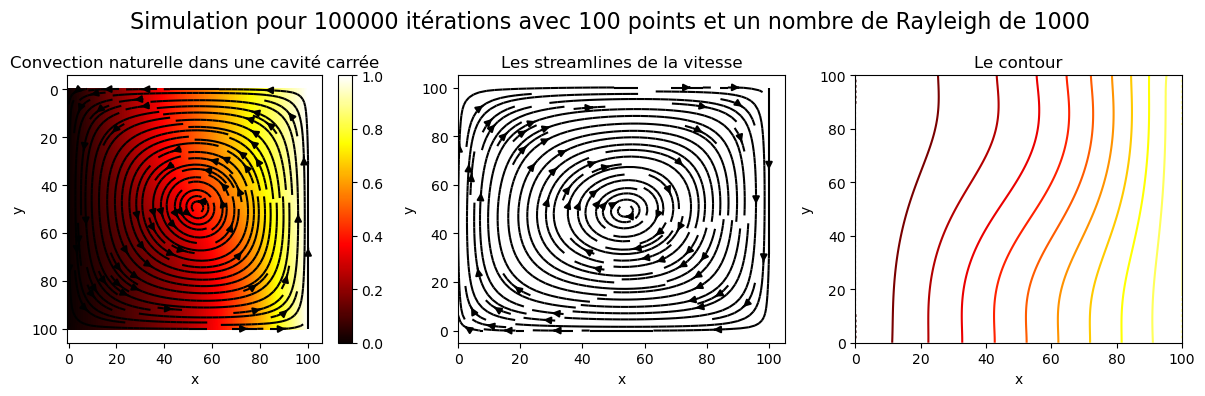

In [50]:
X = np.arange(m+1)
X, Y = np.meshgrid(X, X)

fig = plt.figure(figsize=(12, 4))
fig.suptitle(f'Simulation pour {Nb_iter} itérations avec {m} points et un nombre de Rayleigh de {Ra}', fontsize=16)

ax = fig.add_subplot(1, 3, 1)
ax.set_title('Convection naturelle dans une cavité carrée')
fig.tight_layout()
ax.set_xlabel('x')
ax.set_ylabel('y')
im = ax.imshow(chi, cmap = 'hot')
cbar = plt.colorbar(im)
ax.streamplot(X, Y, v1[X,Y].T, -v2[X,Y].T, color='k', density=1.3)
fig.tight_layout()

ax = fig.add_subplot(1, 3, 2)
ax.set_title('Les streamlines de la vitesse')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.streamplot(X, Y, v1[X,Y].T, -v2[X,Y].T, color='k', density=1.3)
fig.tight_layout()

ax = fig.add_subplot(1, 3, 3)
ax.set_title('Le contour')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.contour(X, Y, chi, 10, cmap = 'hot')
fig.tight_layout()